# 이미지에서 특징 감지하기

## 합성곱 신경망 만들기

### 저장된 이미지 폴더에 따라서 라벨을 만드는 방법
- 케라스 ImageDataGenerator

In [1]:
import tensorflow as tf

## 말과 사람을 구별하는 CNN 만들기

### 이미지 데이터 준비
    - 라벨은 없이 말과 사람 이미지를 다운받아서, 말은 horse 디렉터리에 사람은 human디렉터리에 저장해 놓음
    
## 케라스 ImageDataGenerator
1. image 디렉터리를 지정하면 자동으로 라벨을 생성해주는 클래스
    - 위 내용으로 준비된 디렉터리의 경로를 알려주면 
        - 디렉터리와 이미지를 모니터링 한 후 디렉터리내에 들어 있는 이미지에 대해서는 동일한 라벨을 생성함
        - ex. horse 디렉터리안의 이미지들은 horse라는 타겟값을 생성해 줌
2. 이미지 증식 및 이미지 변환 작업도 진행

### 이미지 데이터 준비
- 분류시 **동일 분류의 이미지는 같은 폴더에 저장** 해야 함
- 구글 api가 제공하는 horse-or-human.zip을 사용

In [6]:
import urllib.request # api 요청 패키지
import zipfile # 압축파일 관련 라이브러리

In [7]:
# 한번 실행하면 다운 완료되므로 재실행 할 필요 없음
# 구글이 제공하는 이미지셋 활용
url = "https://storage.googleapis.com/learning-datasets/horse-or-human.zip"
file_name = "horse-or-human.zip"
training_dir = 'horse-or-human/training/'
# 이미지셋 다운로드
urllib.request.urlretrieve(url, file_name)

('horse-or-human.zip', <http.client.HTTPMessage at 0x1d41ddd3bd0>)

In [9]:
zip_ref = zipfile.ZipFile(file_name, 'r') # 압축객체 생성
zip_ref.extractall(training_dir)
zip_ref.close()

In [57]:
training_dir = 'horse-or-human/training/'

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# 전체 이미지를 1./255로 스케일을 조정합니다.
# 제너레이터 객체 생성
train_datagen = ImageDataGenerator(rescale=1/255)

In [8]:
# gen 객체를 활용해서 이미지 픽셀 값 조정, 이미지 크기 300*300
# 타겟 라벨도 생성
train_generator = train_datagen.flow_from_directory(
    training_dir, 
    target_size = (300, 300), # 이미지 크키를 재조정할 치수
    class_mode = 'binary' # categorical, sparse 등을 사용할 수 있음
)

Found 1027 images belonging to 2 classes.


In [22]:
for x_data, y_data in train_generator :
    print(x_data.shape)
    print(x_data)
    print(y_data)
    break

(32, 300, 300, 3)
[[[[0.24313727 0.23137257 0.24313727]
   [0.25490198 0.2392157  0.25490198]
   [0.25490198 0.24313727 0.25882354]
   ...
   [0.18823531 0.20784315 0.15294118]
   [0.18431373 0.20392159 0.14509805]
   [0.27058825 0.28235295 0.20392159]]

  [[0.25490198 0.23529413 0.2509804 ]
   [0.25490198 0.2392157  0.25882354]
   [0.2509804  0.2392157  0.25882354]
   ...
   [0.18039216 0.19607845 0.14509805]
   [0.16078432 0.17254902 0.1254902 ]
   [0.2392157  0.22352943 0.14117648]]

  [[0.2627451  0.2392157  0.25882354]
   [0.2509804  0.23529413 0.2509804 ]
   [0.2392157  0.23137257 0.2509804 ]
   ...
   [0.16862746 0.1764706  0.13333334]
   [0.14509805 0.14901961 0.10980393]
   [0.20784315 0.1764706  0.09803922]]

  ...

  [[0.6039216  0.5803922  0.5254902 ]
   [0.5764706  0.5411765  0.4784314 ]
   [0.50980395 0.4666667  0.4039216 ]
   ...
   [0.57254905 0.5529412  0.4901961 ]
   [0.6431373  0.65882355 0.6039216 ]
   [0.6666667  0.6901961  0.6431373 ]]

  [[0.56078434 0.5294118  0

flos_from_directory :
    - 준비된 디렉터리를 순환해서 디렉터리명으로 몇개의 클래스가 있는지 확인하고 해당 디렉터리명으로 클래스를 생성해 줌
    - 이미지 변환 기능도 포함하고 있음
flow_from_directory(directory, target_size=(256, 256), color_mode='rgb', classes=None, class_mode='categorical', batch_size=32, shuffle=True, seed=None, save_to_dir=None, save_prefix='', save_format='png', follow_links=False, subset=None, interpolation='nearest')

### 말-사람 데이터셋을 위한 CNN 구조

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

In [41]:
## 모델 생성(입력층 - 합성곱4개층-평탄화-신경망층-출력층)
model = Sequential()
# 층이 정해져있지는 않음 보통 입력층-합성곱층(원하는만큼)-flatten-출력층에 신경망층

In [42]:
model.add(Conv2D(16, (3, 3), activation = 'relu', input_shape = (300, 300, 3)))
model.add(MaxPooling2D((2, 2))) # 특성맵 대표값 압축

In [43]:
model.add(Flatten())# 평탄화 : 1차원으로 
model.add(Dense(512, activation = 'relu')) # 은닉층
model.add(Dense(1, activation = 'sigmoid')) # 출력층

In [44]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 149, 149, 16)      0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 355216)            0         
                                                                 
 dense_4 (Dense)             (None, 512)               181871104 
                                                                 
 dense_5 (Dense)             (None, 1)                 513       
                                                                 
Total params: 181872065 (693.79 MB)
Trainable params: 181872065 (693.79 MB)
Non-trainable params: 0 (0.00 Byte)
________

### CNN 모델의 층 구성
- 층의 수가  정해져있지는 않음 
- 보통 입력층-합성곱층(원하는만큼)-flatten-밀집층-규제-밀집출력층
- 합성곱층의 필터 수는 
    - 16부터 시작해서 또는 16의 배수로 시작 뒤의 층으로 갈수로 16의 배수만큼 늘리는게 일반적
        - 16, 32, 64, 128 순으로 필터수를 결정
- 층을 변경해서 가장 적합한 모델을 만드는것이 합성곱 또는 신경망계열 알고리즘의 튜닝

In [45]:
from tensorflow.keras.optimizers import RMSprop #이미지에 최적화

In [46]:
# 이진분류 compile 코드 
model.compile(loss = 'binary_crossentropy',
              optimizer = RMSprop(learning_rate = 0.001),
              metrics = ['accuracy'])

# 칼라이미지치고 해상도가 낮고 크기도 작은 이미지를 학습할것임
# 학습률을 줄여서 최적점을 찾음

In [47]:
# 모델 학습(에포크 기본 15번)
# 학습 데이터(generator 데이터)는 객체변수 사용-----
model.fit(train_generator, epochs = 15)

Epoch 1/15
33/33 [==============================] - 34s 1s/step - loss: 11.1780 - accuracy: 0.5959
Epoch 2/15
33/33 [==============================] - 32s 954ms/step - loss: 0.3095 - accuracy: 0.8715
Epoch 3/15
33/33 [==============================] - 35s 1s/step - loss: 0.1003 - accuracy: 0.9747
Epoch 4/15
33/33 [==============================] - 34s 1s/step - loss: 0.1778 - accuracy: 0.9367
Epoch 5/15
33/33 [==============================] - 33s 1s/step - loss: 0.0305 - accuracy: 0.9922
Epoch 6/15
33/33 [==============================] - 33s 1s/step - loss: 0.1829 - accuracy: 0.9513
Epoch 7/15
33/33 [==============================] - 34s 1s/step - loss: 0.0193 - accuracy: 0.9971
Epoch 8/15
33/33 [==============================] - 34s 1s/step - loss: 0.0067 - accuracy: 1.0000
Epoch 9/15
33/33 [==============================] - 35s 1s/step - loss: 0.4956 - accuracy: 0.9572
Epoch 10/15
33/33 [==============================] - 34s 1s/step - loss: 0.0154 - accuracy: 0.9990
Epoch 11/15
33/

### 검증 데이터 준비

In [48]:
validation_url = "https://storage.googleapis.com/learning-datasets/validation-horse-or-human.zip"

validation_file_name = "validation-horse-or-human.zip"
validation_dir = 'horse-or-human/validation/'
urllib.request.urlretrieve(validation_url, validation_file_name)

zip_ref = zipfile.ZipFile(validation_file_name, 'r')
zip_ref.extractall(validation_dir)
zip_ref.close()

In [52]:
# 검증 데이터 전처리
val_datagen = ImageDataGenerator(rescale = 1/255)

val_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size = (300, 300),
    class_mode = 'binary'
)

Found 256 images belonging to 2 classes.


In [53]:
for x_data, y_data in val_generator :
    print(x_data)
    print(y_data)
    print(x_data.shape)
    break

[[[[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  [[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  [[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  ...

  [[0.97647065 0.97647065 0.97647065]
   [0.9803922  0.9803922  0.9803922 ]
   [0.97647065 0.97647065 0.97647065]
   ...
   [1.         1.         1.        ]
   [0.9960785  0.9960785  0.9960785 ]
   [0.9960785  0.9960785  0.9960785 ]]

  [[0.97647065 0.97647065 0.97647065]
   [0.9

In [54]:
model.fit(train_generator,
          epochs = 15,
          validation_data = val_generator)

Epoch 1/15
33/33 [==============================] - 35s 1s/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 1.5246 - val_accuracy: 0.7695
Epoch 2/15
33/33 [==============================] - 34s 1s/step - loss: 4.8712e-04 - accuracy: 1.0000 - val_loss: 2.1221 - val_accuracy: 0.7188
Epoch 3/15
33/33 [==============================] - 35s 1s/step - loss: 0.2785 - accuracy: 0.9659 - val_loss: 1.6676 - val_accuracy: 0.6953
Epoch 4/15
33/33 [==============================] - 35s 1s/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 1.5633 - val_accuracy: 0.7500
Epoch 5/15
33/33 [==============================] - 36s 1s/step - loss: 6.5469e-04 - accuracy: 1.0000 - val_loss: 1.8270 - val_accuracy: 0.7305
Epoch 6/15
33/33 [==============================] - 36s 1s/step - loss: 3.3781e-04 - accuracy: 1.0000 - val_loss: 2.1609 - val_accuracy: 0.7070
Epoch 7/15
33/33 [==============================] - 35s 1s/step - loss: 0.0750 - accuracy: 0.9805 - val_loss: 2.8071 - val_accuracy: 0.6328
Epoch 8/

## `image_dataset_from_directory` 사용하기

- 기본 파라미터
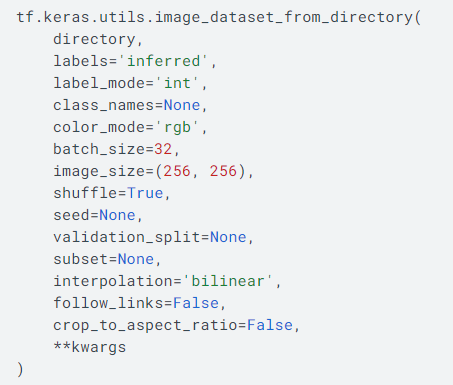

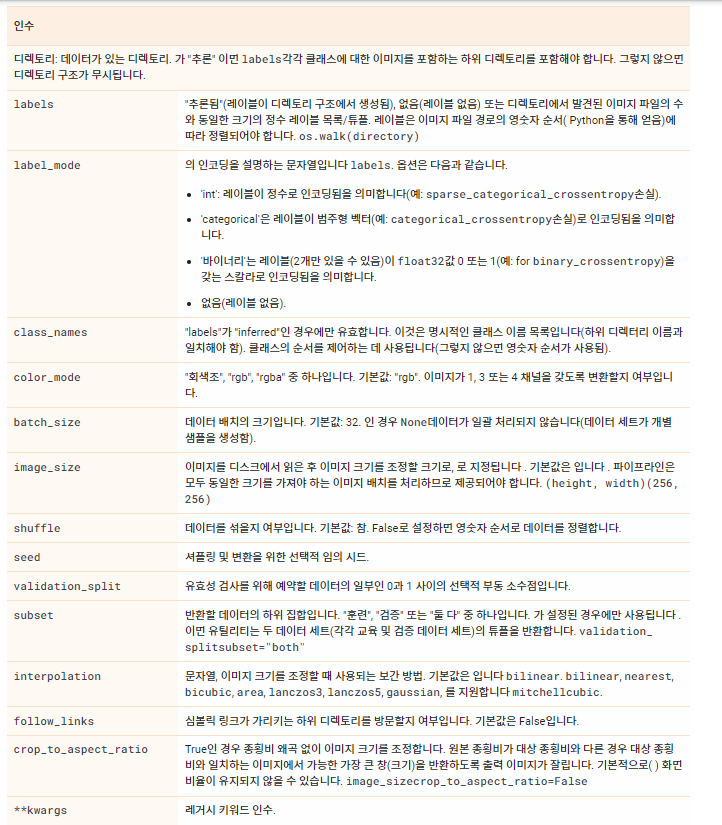

### image_dataset_from_directory vs flow_from_directory
- 포함 라이브러리가 다름
- tf.keras.utils.image_dataset_from_directory()
    - 디렉터리의 이미지 파일에서 tf.data.Dataset을 생성합니다 .
    - 이미지에 대한 라벨링을 진행
- ImageDataGenerator.flow_from_directory()
    - 디렉터리에 대한 경로를 가져오고 증강 데이터 배치를 생성합니다 .
    - 이미지 증식이 가능함

In [58]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    training_dir,
    image_size = (300, 300),
    label_mode = 'binary'
) # 이미지 정규화 진행기능 없음

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 32: invalid continuation byte

In [59]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Rescaling(1/255, input_shape = (300, 300, 3)),
    # 코드추가
    #input층 생성시 이미지 전처리를 진행하게 설정
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

In [ ]:
model.fit(train_ds, epochs = 15)
# train_ds는 전처리 되지 않은 이미지 데이터가 주입
# model에 rescaling층이 있어서 모델에 이미지 주입되면 rescale 진행 후 학습

- tf.keras.utils.image_dataset_from_directory() 보다는 generate를 더 많이 사용함
- 위에서 생성해 놓은 generate 객체 이용해서 진행
- **검증 데이터 다운로드 후 검증 세트 추가**

## 모델에 합성곱 층 추가하기
### 검증 세트 추가하기

In [60]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', 
                           input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'), # 합성곱층 추가
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [61]:
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

In [62]:
# 검증데이터 다운로드
validation_url = "https://storage.googleapis.com/learning-datasets/validation-horse-or-human.zip"

validation_file_name = "validation-horse-or-human.zip"
validation_dir = 'horse-or-human/validation/'
urllib.request.urlretrieve(validation_url, validation_file_name)

zip_ref = zipfile.ZipFile(validation_file_name, 'r')
zip_ref.extractall(validation_dir)
zip_ref.close()

In [63]:
# conv2d 층이 더 많이 추가된 모델
model.fit(train_generator,
          epochs = 15,
          validation_data = val_generator)

Epoch 1/15
33/33 [==============================] - 20s 582ms/step - loss: 0.7733 - accuracy: 0.6728 - val_loss: 0.9200 - val_accuracy: 0.8047
Epoch 2/15
33/33 [==============================] - 20s 587ms/step - loss: 0.2849 - accuracy: 0.8870 - val_loss: 1.0041 - val_accuracy: 0.8438
Epoch 3/15
33/33 [==============================] - 20s 612ms/step - loss: 0.2610 - accuracy: 0.9163 - val_loss: 0.5919 - val_accuracy: 0.8828
Epoch 4/15
33/33 [==============================] - 21s 662ms/step - loss: 0.1778 - accuracy: 0.9328 - val_loss: 1.1223 - val_accuracy: 0.8438
Epoch 5/15
33/33 [==============================] - 21s 625ms/step - loss: 0.1005 - accuracy: 0.9572 - val_loss: 2.0131 - val_accuracy: 0.8086
Epoch 6/15
33/33 [==============================] - 21s 625ms/step - loss: 0.1076 - accuracy: 0.9581 - val_loss: 2.4644 - val_accuracy: 0.8281
Epoch 7/15
33/33 [==============================] - 21s 617ms/step - loss: 0.0429 - accuracy: 0.9834 - val_loss: 2.0124 - val_accuracy: 0.8477

### 모델 실행하기

In [64]:
# 배부된 image 이용해서 모델 활용해보기
import sys
sample_images = ['./image/hh_image_{}.jpg'.format(i) for i in range(1,4)]

In [65]:
sample_images

['./image/hh_image_1.jpg', './image/hh_image_2.jpg', './image/hh_image_3.jpg']

In [66]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing import image

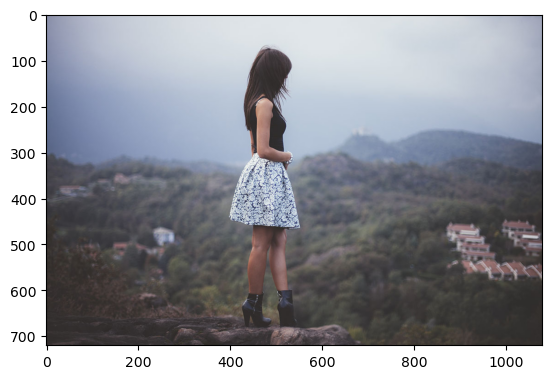

In [70]:
plt.imshow(mpimg.imread(sample_images[0]))
plt.show()

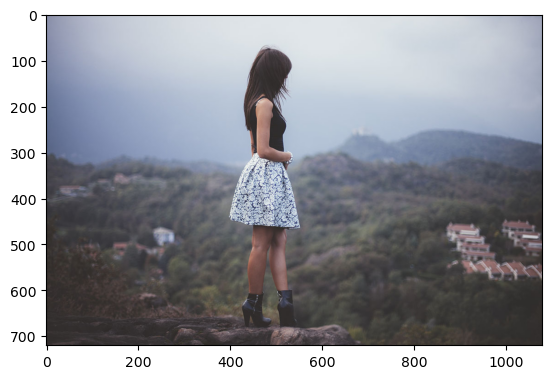

1/1 [==============================] - 0s 147ms/step
모델 출력: 1.0
./image/hh_image_1.jpg는 사람입니다.
--------------------


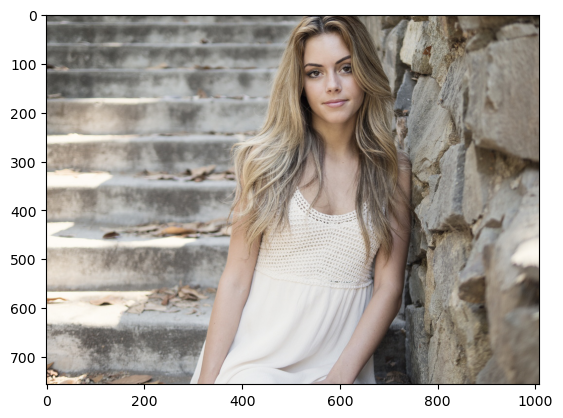

1/1 [==============================] - 0s 39ms/step
모델 출력: 0.0
./image/hh_image_2.jpg는 말입니다.
--------------------


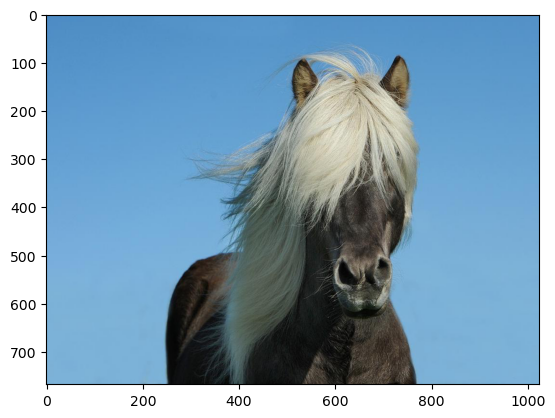

1/1 [==============================] - 0s 38ms/step
모델 출력: 1.0
./image/hh_image_3.jpg는 사람입니다.
--------------------


In [71]:
for fn in sample_images:
    # 이미지 출력
    plt.imshow(mpimg.imread(fn))
    plt.show()
    
    # 이미지 불러오기
    img = tf.keras.utils.load_img(fn, target_size = (300, 300))
    x = tf.keras.utils.img_to_array(img)
    # 이미지 차원 확장 : 3차원 칼라이미지 (300, 300, 3) 학습이미지(이미지수, 이미지높이, 넓이, 채널)
    x = np.expand_dims(x, axis = 0) # (1, 300, 300, 3)
    # 분류 예측
    classes = model.predict(x)
    
    print('모델 출력:',classes[0][0] )
    if classes[0][0] > 0.5:
        print(fn + "는 사람입니다.")
    else:
        print(fn + "는 말입니다.")
    print('--------------------')

## 이미지 증식

### 증강 vs 증식
- CNN 모델의 성능을 높이고 과적합을 방지하는 가장 좋은 방법
    - 이미지 데이터 양을 늘리거나 이미지의 다양한 유형을 학습하게 하는 방법
- 이미지(데이터) 증식 : 원본이미지(원본데이터)를 이용해서 변형된 이미지(데이터) 개수를 즐리는 것
    - 학습이미지 수가 늘어나게 됨
    - 증식을 이용하려면 증강(변화)된 이미지를 저장해서 사용
- 이미지(데이터) 증강 : 학습이미지의 개수를 늘리는 것이 아니고 학습 시 마다 개별 원본이미지를 변형해서 학습을 진행하는 기법
    - 이미지 개수를 늘리지 않고도 여러 유형의 이미지를 학습할 수 있게 해주는 방법

In [89]:
from keras.preprocessing.image import array_to_img, img_to_array, load_img

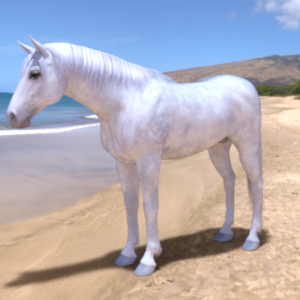

In [96]:
img = load_img((training_dir + 'horses/horse01-1.png'))
img

In [94]:
aug_gen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 15,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    shear_range = 0.5,
    zoom_range = [0.8, 2.0],
    horizontal_flip = True,
    fill_mode = 'nearest'
)

In [95]:
x = img_to_array(img)
x = x.reshape((1,) + x.shape)
x.shape

(1, 300, 300, 3)

In [97]:
add_img_path = './image' # 증식 이미지 저장 폴더
i = 0
aug = aug_gen.flow(x, batch_size = 1, save_to_dir = add_img_path, save_prefix = "horses", save_format ="png")

for batch in aug :
    i += 1
    if i > 50 :
        break

In [ ]:
이미지 증강

In [83]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', 
                           input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [84]:
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

In [85]:
## 이미지 증식은 학습데이터에 대해서만 진행
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

In [86]:
train_generator = train_datagen.flow_from_directory(
    training_dir,
    target_size = (300, 300),
    class_mode = 'binary'
)

Found 1027 images belonging to 2 classes.


In [87]:
model.fit(train_generator,
          epochs = 15,
          validation_data = val_generator)

Epoch 1/15
33/33 [==============================] - 38s 1s/step - loss: 0.7079 - accuracy: 0.5044 - val_loss: 0.7520 - val_accuracy: 0.5000
Epoch 2/15
33/33 [==============================] - 34s 1s/step - loss: 0.6970 - accuracy: 0.6592 - val_loss: 0.5962 - val_accuracy: 0.6289
Epoch 3/15
33/33 [==============================] - 34s 1s/step - loss: 0.5974 - accuracy: 0.7059 - val_loss: 0.8364 - val_accuracy: 0.6211
Epoch 4/15
33/33 [==============================] - 34s 1s/step - loss: 0.4806 - accuracy: 0.7722 - val_loss: 2.8708 - val_accuracy: 0.5781
Epoch 5/15
33/33 [==============================] - 34s 1s/step - loss: 0.4122 - accuracy: 0.8043 - val_loss: 1.7517 - val_accuracy: 0.6797
Epoch 6/15
33/33 [==============================] - 34s 1s/step - loss: 0.3530 - accuracy: 0.8559 - val_loss: 0.5526 - val_accuracy: 0.8906
Epoch 7/15
33/33 [==============================] - 34s 1s/step - loss: 0.4267 - accuracy: 0.8296 - val_loss: 1.7044 - val_accuracy: 0.7148
Epoch 8/15
33/33 [==

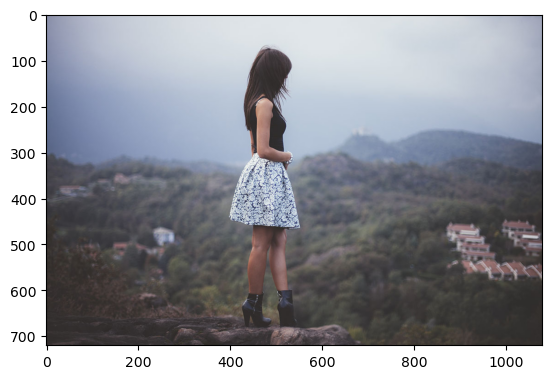

1/1 [==============================] - 0s 119ms/step
모델 출력: 1.0
./image/hh_image_1.jpg는 사람입니다.
--------------------


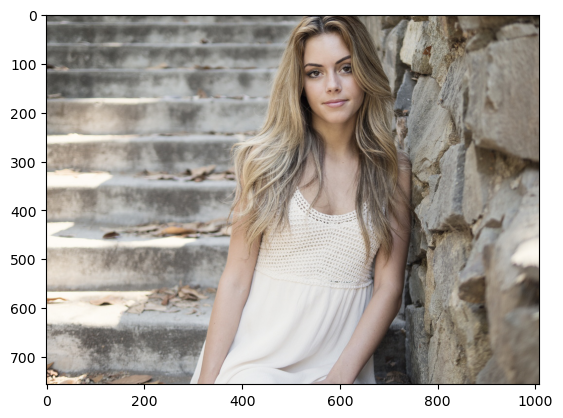

1/1 [==============================] - 0s 37ms/step
모델 출력: 1.0
./image/hh_image_2.jpg는 사람입니다.
--------------------


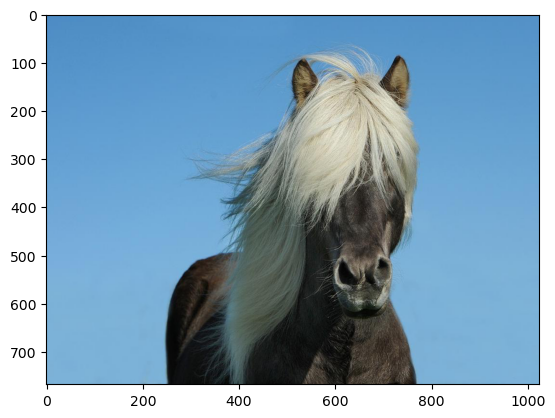

1/1 [==============================] - 0s 40ms/step
모델 출력: 0.0
./image/hh_image_3.jpg는 말입니다.
--------------------


In [88]:
for fn in sample_images:
    # 이미지 출력
    plt.imshow(mpimg.imread(fn))
    plt.show()
    
    # 이미지 불러오기
    img = tf.keras.utils.load_img(fn, target_size=(300,300) )
    x = tf.keras.utils.img_to_array(img)
    x = np.expand_dims(x, axis=0) # 3차원 칼라이미지를 4차원 이미지로 변형
    ##(1,300,30,3)
    classes = model.predict(x)

    print('모델 출력:',classes[0][0] )
    if classes[0][0] > 0.5:
        print(fn + "는 사람입니다.")
    else:
        print(fn + "는 말입니다.")
    print('--------------------')

### 이미지 변환 예제

In [72]:
# !pip install opencv-python 

In [73]:
# !pip install wget

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9680 sha256=7be534dddb0be6730bb658297851b3b3df1284c71363d68db0c9ab2913418914
  Stored in directory: c:\users\82105\appdata\local\pip\cache\wheels\40\b3\0f\a40dbd1c6861731779f62cc4babcb234387e11d697df70ee97
Successfully built wget


In [ ]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [74]:
#이미지 다운로드
# 리눅스
# !wget https://www.sciencenews.org/wp-content/uploads/2020/03/033120_HT_covid-cat_feat-1028x579.jpg
# 윈도우
import wget
url = "https://www.sciencenews.org/wp-content/uploads/2020/03/033120_HT_covid-cat_feat-1028x579.jpg"
wget.download(url)

100% [..............................................................................] 61745 / 61745

'033120_HT_covid-cat_feat-1028x579.jpg'

In [76]:
image = cv2.cvtColor(cv2.imread('033120_HT_covid-cat_feat-1028x579.jpg'),
                    cv2.COLOR_BGR2RGB)

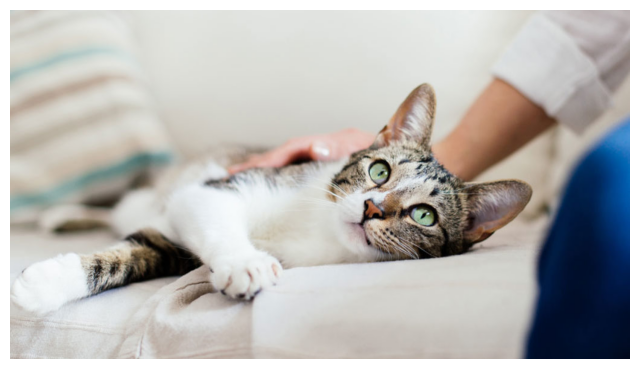

In [75]:
def show_image(image) :
    plt.figure(figsize=(8,8))
    plt.imshow(image)
    plt.axis('off')
    
show_image(image)

In [78]:
d_gen = ImageDataGenerator(horizontal_flip = True, rotation_range = 40) # 변환내용결정
image_batch = np.expand_dims(image, axis = 0) # 차원 확장
d_gen.fit(image_batch) # 데이터를 변환내용에 맞게 연산
d_gen_iter = d_gen.flow(image_batch) # 변환

In [79]:
# next 함수 이용해 실행
a_batch = next(d_gen_iter)

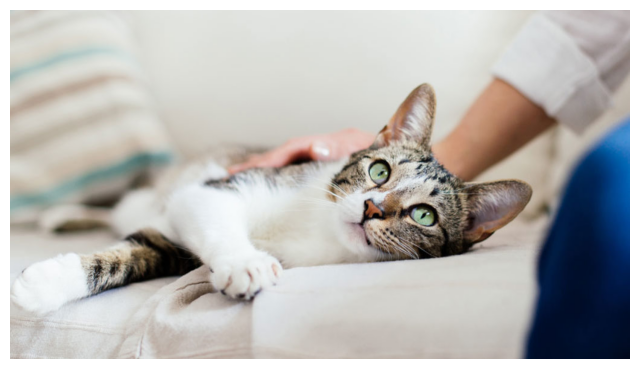

In [82]:
a_image = np.squeeze(a_batch) # 차원축소
a_image = a_image.astype('int') # 실수 -> 정수
show_image(image)

#### `image_dataset_from_directory` 사용하기

In [44]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    training_dir,
    image_size=(300, 300),
    label_mode='binary'
)

validation_ds = tf.keras.utils.image_dataset_from_directory(
    validation_dir,
    image_size=(300, 300),
    label_mode='binary'
)

Found 1027 files belonging to 2 classes.
Found 256 files belonging to 2 classes.


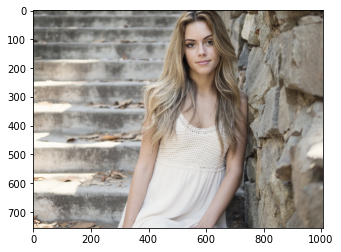

1/1 [==============================] - 0s 90ms/step
모델 출력: 1.0
./image/hh_image_2.jpg는 사람입니다.


In [46]:
fn = sample_images[1]
plt.imshow(mpimg.imread(fn))
plt.show()

# 이미지 불러오기
img = tf.keras.utils.load_img(fn, target_size=(300, 300))
x = tf.keras.utils.img_to_array(img)
x = np.expand_dims(x, axis=0)

classes = model.predict(x)

print('모델 출력:', classes[0][0])
if classes[0][0] > 0.5:
    print(fn + "는 사람입니다.")
else:
    print(fn + "는 말입니다.")